In [87]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets 
import matplotlib.pyplot as plt
%matplotlib inline


boston = datasets.load_boston()

In [55]:
# Lets explore a bit the Boston data:
print "boston keys: ", boston.keys()
print "boston feature names", boston.feature_names
# DESCR says "Median Value (attribute 14) is usually the target" 
# The MEDV is the boston.target      

boston keys:  ['data', 'feature_names', 'DESCR', 'target']
boston feature names ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT' 'MEDV']


In [57]:
# get the df from boston data
boston_df = pd.DataFrame(np.column_stack([boston.data, boston.target]), columns = boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [61]:
# Lets make it simple, 
# we select the target data: 
# - MEDV     Median value of owner-occupied homes in $1000's
# and we selecvt couple of categorial independent variables:
# - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# - RAD      index of accessibility to radial highways

boston_df = boston_df[["MEDV", "CHAS", "RAD"]]

In [63]:
boston_df.head()

,MEDV,CHAS,RAD
0,24.0,0,1
1,21.6,0,2
2,34.7,0,2
3,33.4,0,3
4,36.2,0,3


In [ ]:
# Perform the regression
from sklearn import datasets, linear_model

# create the model
regr = linear_model.LinearRegression()

### - - - First version, simple linear reg. one variable, simple split

('Coefficients: \n', array([-0.10474212]))
Residual sum of squares: 91.83
Variance score: -2.16


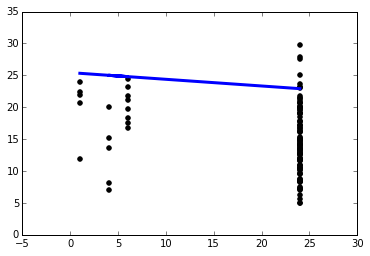

In [89]:
from sklearn import datasets, linear_model

# If we just split our sample to training and testing, with ratio e.g. 75/25
# And use only one feature

# Each newaxis object in the selection tuple serves to expand the dimensions of the 
# resulting selection by one unit-length dimension
# boston_df["RAD"].shape ,  (506,)
# boston_df["RAD"][:, np.newaxis].shape, (506, 1)   <= this is the desired format for the independent variables
# boston_df["MEDV"].shape, (506, )                  <= this is the desired format for the target variable

boston_X = boston_df["RAD"][:, np.newaxis]
boston_y = boston_df["MEDV"]

 
# Split the data into training/testing sets
boston_X_train = boston_X[:-120]
boston_X_test = boston_X[-120:]

# Split the targets into training/testing sets
boston_y_train = boston_y[:-120]
boston_y_test = boston_y[-120:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(boston_X_train, boston_y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean square error
print("Residual sum of squares: %.2f" % np.mean((regr.predict(boston_X_test) - boston_y_test) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(boston_X_test, boston_y_test))

# Plot outputs
plt.scatter(boston_X_test, boston_y_test,  color='black')
plt.plot(boston_X_test, regr.predict(boston_X_test), color='blue', linewidth=3)
plt.show()


In [94]:
 

print boston_df["MEDV"].shape
print boston_df["RAD"][:, np.newaxis].shape





(506,)
(506, 1)


In [ ]:
# Prepare the data , training and test parts
# !!! Attention !!!
# Split sample validation without resampling (cross-validation, or better: bootstrapping)
# is unreliable unless you have a bery big sample (e.g., N>20000). 

# If the sample is big
# Probably a simple split would work 75/25.
# We have just to run twice (2 splits) and we see how much results vary. 
# They probably vary so little that you only need one split.
# Think of the width of a confidence interval for a proportion with such a big sample size

# In our case the sample size is 506 - not so big.
# We better do cross-validation (and later bootstrapping)

from sklearn import cross_validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(
    iris.data, iris.target, test_size=0.4, random_state=0)



In [64]:
len(boston_df)

506

In [66]:
diabetes = datasets.load_diabetes()
len(diabetes.data)

442